# Exercise 4: Multivariate analysis

For this exercise we recommend using [SciKit-Learn](https://scikit-learn.org/stable/index.html)

## Machine Learning for the $\tau^-\to\mu^-\mu^+\mu^-$ search at LHCb

The LHCb experiment at CERN is able to search for exotic decays of the $\tau$ lepton to three muons. This process is fobidden in the Standard Model but is predicted to be sizeable in several theories beyond the Standard Model.

Your goal is to maximise the chances to find this decay in the dataset collected by LHCb using a Machine Learning technique to classify the recorded events as signal or background.

You are given a dataset composed of labelled signal (`signal==1`) and background (`signal==0`) events. Each event is described by a set of *features* whose distribution might be different between signal and background. The goal is to train a Machine Learning classifier to guess if an event is signal or background based on these features.

Here's the list of features recorded in the dataset that you can use for the classification:
* `DecayTime` - How long the $\tau$ candidate existed before decaying.
* `IP` - [Impact parameter](https://en.wikipedia.org/wiki/Impact_parameter) of the $\tau$ candidate and the collision point.
* `VertexChi2` - The $\chi^2$ of a fit to locate the $\tau$ decay vertex.
* `pt` - Transverse momentum of the $\tau$.
* `DOCAone` - Distance of closest approach between first and second muons.
* `DOCAtwo` - Distance of closest approach between second and third muons.
* `DOCAthree` - Distance of closest approach between first and third muons.
* `isolationa` - Track isolation variable.
* `isolationb` - Track isolation variable.
* `isolationc` - Track isolation variable.
* `p0_pt` - Transverse momentum of the first muon.
* `p1_pt` - Transverse momentum of the second muon.
* `p2_pt` - Transverse momentum of the third muon.
* `p0_IP` - Impact parameter of the first muon.
* `p1_IP` - Impact parameter of the second muon.
* `p2_IP` - Impact parameter of the third muon.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('training_reduced.csv')
df

,signal,LifeTime,IP,VertexChi2,pt,DOCAone,DOCAtwo,DOCAthree,isolationa,isolationb,isolationc,p0_pt,p1_pt,p2_pt,p0_IP,p1_IP,p2_IP
0,0,0.001578,0.016039,1.900433,1482.037476,0.066667,0.060602,0.083660,8,5,7,353.819733,448.369446,1393.246826,0.988054,0.601483,0.277090
1,0,0.000988,0.142163,0.865666,3050.720703,0.024022,0.019245,0.030784,7,12,2,656.524902,2033.918701,747.137024,0.098752,0.219099,0.614524
2,0,0.000877,0.034746,10.975849,3895.908691,0.055044,0.047947,0.096829,1,0,1,658.523743,2576.380615,963.652466,0.186143,0.215668,0.371820
3,0,0.000854,0.076389,3.276358,4010.781738,0.053779,0.006417,0.044816,2,2,4,1047.216187,1351.734131,1685.003662,0.255752,0.210698,0.392195
4,0,0.001129,0.120936,0.468348,4144.546875,0.004491,0.037326,0.019026,0,2,0,1442.538208,1755.792236,1282.428711,0.270755,0.183355,0.630763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67548,1,0.002119,0.048056,2.259959,4448.312500,0.050823,0.018611,0.005267,0,2,0,492.777771,2983.029541,1216.187988,0.601514,0.505448,0.863186
67549,1,0.002150,0.059266,1.288439,4094.758545,0.027567,0.000755,0.002626,9,5,3,990.468872,2798.172363,628.293091,0.542935,0.413216,1.182220
67550,1,0.000969,0.051560,1.725869,2481.475830,0.057835,0.013549,0.023930,0,0,0,686.589600,915.056702,1358.508545,0.153902,0.394316,0.268432
67551,1,0.001296,0.051905,0.454716,3977.924561,0.035837,0.012449,0.033374,0,0,0,363.099945,2065.975342,1719.885864,0.556334,0.183260,0.533233


1. Calculate the [Kolmogorov-Smirnov test](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test) between signal and background for each of the features of the dataset. The test evaluates how likely are two data samples to be drawn from the same PDF, and therefore should be larger for the features that are most powerful to discriminate signal and background.

*Hint:* you can use the [`ks_2samp` function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html) from `scipy.stats` to compute the Kolmogorov-Smirnov test between two samples

*Hint:* you can get the list of features from the DataFrame column headings, i.e. `d.keys()`

# Solution
I plotted the data in histograms with the title showing the key and the results from ```ks_2samp```. In blue the background and red the signal.

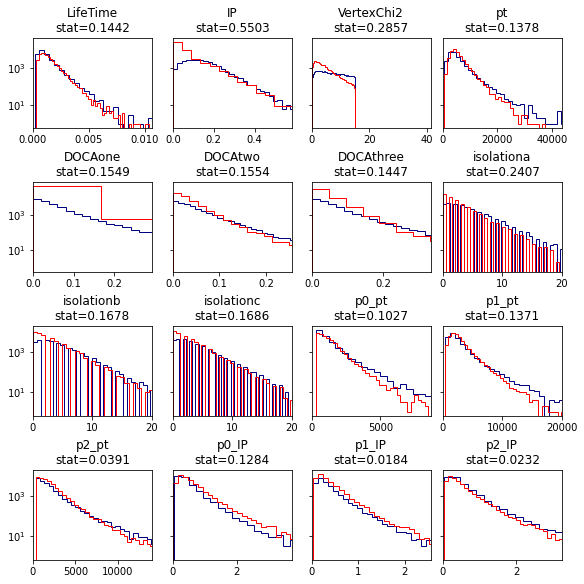

In [58]:
from scipy.stats import ks_2samp
# help(ks_2samp)
cols = df.columns[1:]

mask = df["signal"] < 1

fig, axes = plt.subplots(4, 4, constrained_layout=True, figsize=(8,8), sharey="row")
axes = axes.flatten()

for i, col in enumerate(cols):
    # p value is always 0
    axes[i].set_title(col+"\nstat=%.4f"%ks_2samp(df[col][mask], df[col][~mask])[0])
    axes[i].hist(df[col][mask], color="navy", histtype="step", bins=50)
    axes[i].hist(df[col][~mask], color="red", histtype="step", bins=50)
    axes[i].set_xlim(0, 10*np.median(df[col]))
    axes[i].set_yscale('log')

2. The least and most discriminating features are the ones with the lowest and highest Kolmogorov-Smirnov scores, respectively. Compare the signal and background distributions for these two features.

**NB:** please do not use the label `signal` as a feature!

# Solution
look above in 1.

3. Split the dataset *randomly* in two halves: we will use one half for training our classifier and the other half to test it.

*Hint:* you can use the function `train_test_split` from `sklearn.model_selection`

**NB:** the dataset is ordered by `signal`, hence the need for random splitting.

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop("signal", axis=1), df["signal"], test_size = 0.5)
X_train[cols[2:5]]

,VertexChi2,pt,DOCAone
61266,0.806008,3237.047363,0.065277
11873,2.436999,7742.861816,0.025511
4695,7.019752,10765.434570,0.014925
9317,4.902632,8856.629883,0.029438
11685,1.415731,4911.908203,0.013131
...,...,...,...
40282,1.866709,1175.568604,0.008502
45250,0.822937,4159.596680,0.029361
30703,6.307598,6171.011719,0.019835
12337,11.269164,2418.037354,0.018385


4.

i. Train a [Gaussian naive Bayes classifier](https://scikit-learn.org/stable/modules/naive_bayes.html) on the training sample using the three features of your choice (possibly the most discriminant ones). You can use [`GaussianNB` from `sklearn.naive_bayes`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)

In [103]:
from sklearn.naive_bayes import GaussianNB

print("using", *list(cols[1: 3]), cols[7], "\n")

# define train/test x as only the three best discriminating values 
x_train = X_train["IP VertexChi2 isolationa".split()]
x_test = X_test["IP VertexChi2 isolationa".split()]
gnb = GaussianNB()
gnb.fit(x_train, y_train)

prediction = gnb.predict(x_test)

score = gnb.score(x_test, y_test)

print(f"{score:%} of the data could be predicted")

using IP VertexChi2 isolationa 

75.311603% of the data could be predicted


ii. Now train a [gradient-boosted decision tree (GBDT)](https://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting) on the training sample using the same three features. You can use [`GradientBoostingClassifier` from `sklearn.ensemble`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)

In [137]:
from sklearn.ensemble import GradientBoostingClassifier as GBC

gbdt = GBC(n_estimators=100, learning_rate=0.05, max_depth=3, random_state=0).fit(x_train, y_train)
score = gbdt.score(x_test, y_test)

print(f"{score:%} of the data could be predicted")

80.033751% of the data could be predicted


5. Calculate the classifier responses on both the training and testing samples and overlay histograms of the response for signal and background.

*Hint:* to evaluate the response use `gbdt.decision_function()` and `gnb.predict_proba()`

*Hint:* the `predict_proba()` function will return a 2D array: background & signal probabilities for each point in the sample. You can call `predict_proba(...)[:,0]` or `predict_proba(...)[:,1]` to obtain just the signal score.

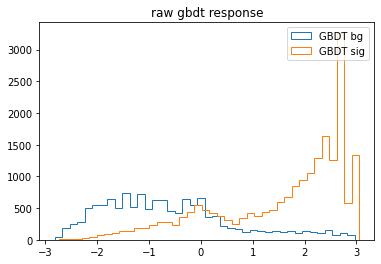

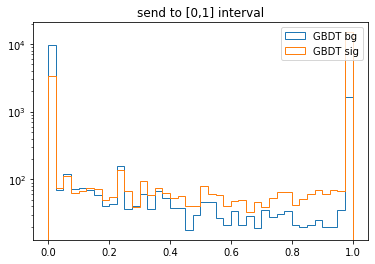

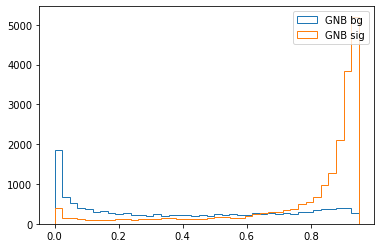

In [144]:
mask = y_test < 1

score_gbdt = gbdt.decision_function(x_test)
score_gnb = gnb.predict_proba(x_test)[:,1]

# maybe normalize ?
score_gbdt_norm = ( score_gbdt - score_gbdt.min() ) / (score_gbdt.max() - score_gbdt.min())

# maybe "cut" to [0,1]
score_gbdt_window = score_gbdt.copy()
score_gbdt_window[score_gbdt<0] = 0
score_gbdt_window[score_gbdt>1] = 1


plt.hist(score_gbdt[mask], histtype="step", bins=40, label="GBDT bg")
plt.hist(score_gbdt[~mask], histtype="step", bins=40, label="GBDT sig")
plt.legend()
plt.title("raw gbdt response")
plt.show()

plt.hist(score_gbdt_window[mask], histtype="step", bins=40, label="GBDT bg")
plt.hist(score_gbdt_window[~mask], histtype="step", bins=40, label="GBDT sig")
plt.legend()
plt.title("send to [0,1] interval")
plt.yscale('log')
plt.show()

plt.hist(score_gnb[mask], histtype="step", bins=40, label="GNB bg")
plt.hist(score_gnb[~mask], histtype="step", bins=40, label="GNB sig")
plt.legend()
plt.show()

6. Check if there is overtraining by performing a Kolmogorov-Smirnov test on the classifier responses between the training and testing sample. If you did not overtrain the classifier, its response should be the same on the training and testing samples both for signal and for background. Therefore the K-S scores should be small (~0.01).

In [148]:
mask_train = y_train < 1
mask_test = y_test < 1

# predictions by the classifiers on diff. samples
gnb_test = gnb.predict_proba(x_test)[:,1]
gnb_train = gnb.predict_proba(x_train)[:,1]

gbdt_test = gbdt.decision_function(x_test)
gbdt_train = gbdt.decision_function(x_train)

# unnecessary for-loop trololo
for clf_name, clf in zip(["GNB", "GBDT"], [[gbdt_train, gbdt_test], [gnb_train, gnb_test]]):
    # bg
    ks_bg = ks_2samp(clf[0][mask_train], clf[1][mask_test])
    # sig
    ks_sig = ks_2samp(clf[0][~mask_train], clf[1][~mask_test])
    
    print("For ", clf_name)
    print("Background: %.3f" % ks_bg[0])
    print("Signal: %.3f" % ks_sig[0])

For  GNB
Background: 0.012
Signal: 0.009
For  GBDT
Background: 0.012
Signal: 0.009


7. Show the performance of your classifiers with a ROC curve. Plot the ROC curves on the same plot and label the axes.

*Hint:* you can use the function `roc_curve` from `sklearn.metrics`

In [153]:
from sklearn.metrics import roc_curve, plot_roc_curve

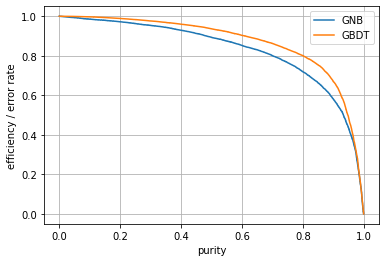

In [163]:
# plt.plot(roc_curve(y_test, gnb_test))

fpr, tpr, thresholds = roc_curve(y_test, gnb_test) 
plt.plot(1-fpr, tpr, label="GNB")

fpr, tpr, thresholds = roc_curve(y_test, gbdt_test) 
plt.plot(1-fpr, tpr, label="GBDT")


plt.xlabel("purity")
plt.ylabel("efficiency / error rate")

plt.legend()
plt.grid()

**Bonus**: Try to improve the performance of your classifier by including more features and changing the initialisation options of the `GradientBoostingClassifier` object.

### Answer:

When initializing by GBDT I changed it already to reach a score of 80%!

using IP VertexChi2 DOCAone DOCAtwo DOCAthree isolationa isolationb isolationc 

73.564852% of the data could be predicted
80.276520% of the data could be predicted


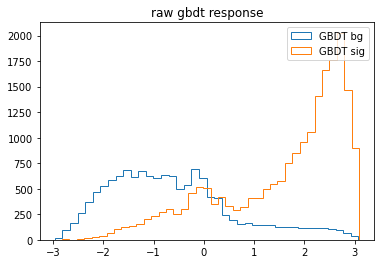

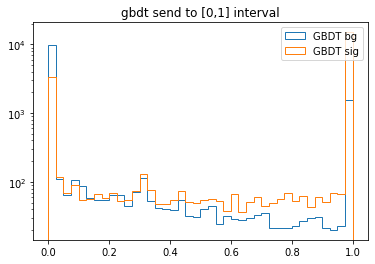

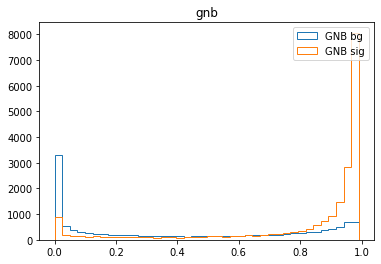

For  GNB
Background: 0.012
Signal: 0.009
For  GBDT
Background: 0.016
Signal: 0.012


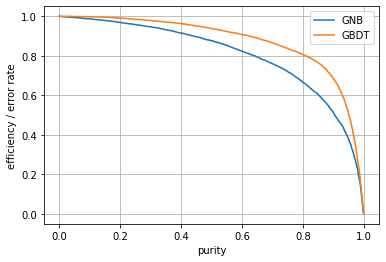

using IP VertexChi2 isolationa 

75.311603% of the data could be predicted
80.033751% of the data could be predicted


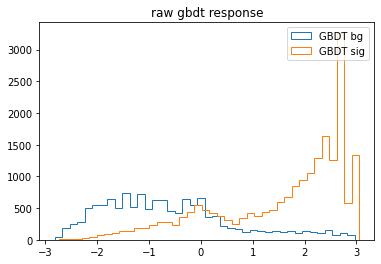

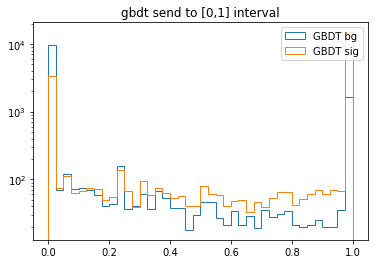

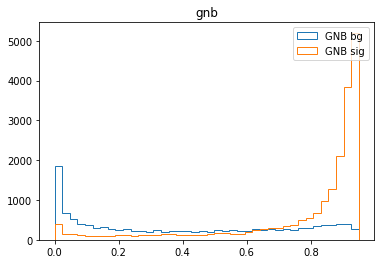

For  GNB
Background: 0.012
Signal: 0.009
For  GBDT
Background: 0.012
Signal: 0.009


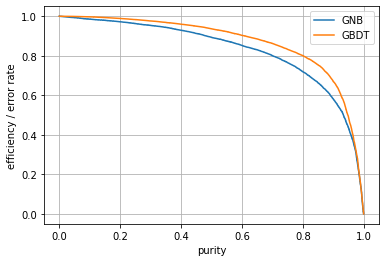

using IP VertexChi2 isolationa isolationb isolationc 

74.793499% of the data could be predicted
80.270598% of the data could be predicted


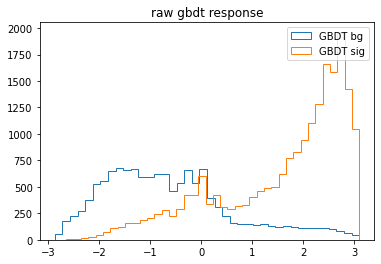

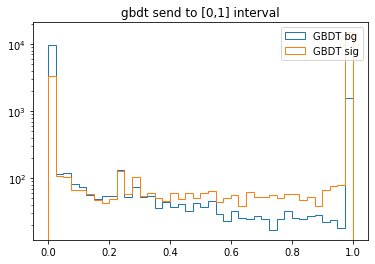

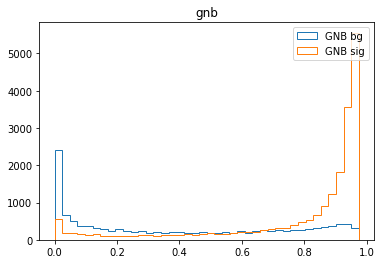

For  GNB
Background: 0.011
Signal: 0.010
For  GBDT
Background: 0.013
Signal: 0.010


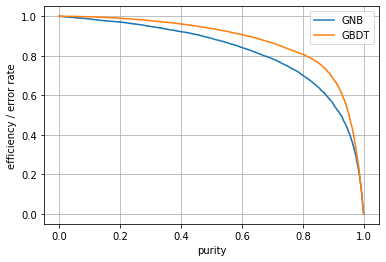

In [169]:
for features in [list(cols[1: 3]) + list(cols[4:10]), list(cols[1: 3]) + [cols[7]], list(cols[1: 3]) + list(cols[7:10])]:
    print("using", *features, "\n")

    # define train/test x as only the three best discriminating values 
    x_train = X_train[features]
    x_test = X_test[features]
    gnb = GaussianNB()
    gnb.fit(x_train, y_train)

    prediction = gnb.predict(x_test)

    score = gnb.score(x_test, y_test)

    print(f"{score:%} of the data could be predicted")



    gbdt = GBC(n_estimators=100, learning_rate=0.05, max_depth=3, random_state=0).fit(x_train, y_train)
    score = gbdt.score(x_test, y_test)

    print(f"{score:%} of the data could be predicted")


    mask = y_test < 1

    score_gbdt = gbdt.decision_function(x_test)
    score_gnb = gnb.predict_proba(x_test)[:,1]

    # maybe normalize ?
    score_gbdt_norm = ( score_gbdt - score_gbdt.min() ) / (score_gbdt.max() - score_gbdt.min())

    # maybe "cut" to [0,1]
    score_gbdt_window = score_gbdt.copy()
    score_gbdt_window[score_gbdt<0] = 0
    score_gbdt_window[score_gbdt>1] = 1


    plt.hist(score_gbdt[mask], histtype="step", bins=40, label="GBDT bg")
    plt.hist(score_gbdt[~mask], histtype="step", bins=40, label="GBDT sig")
    plt.legend()
    plt.title("raw gbdt response")
    plt.show()

    plt.hist(score_gbdt_window[mask], histtype="step", bins=40, label="GBDT bg")
    plt.hist(score_gbdt_window[~mask], histtype="step", bins=40, label="GBDT sig")
    plt.legend()
    plt.title("gbdt send to [0,1] interval")
    plt.yscale('log')
    plt.show()

    plt.hist(score_gnb[mask], histtype="step", bins=40, label="GNB bg")
    plt.hist(score_gnb[~mask], histtype="step", bins=40, label="GNB sig")
    plt.legend()
    plt.title("gnb")
    plt.show()



    mask_train = y_train < 1
    mask_test = y_test < 1

    # predictions by the classifiers on diff. samples
    gnb_test = gnb.predict_proba(x_test)[:,1]
    gnb_train = gnb.predict_proba(x_train)[:,1]

    gbdt_test = gbdt.decision_function(x_test)
    gbdt_train = gbdt.decision_function(x_train)

    # unnecessary for-loop trololo
    for clf_name, clf in zip(["GNB", "GBDT"], [[gbdt_train, gbdt_test], [gnb_train, gnb_test]]):
        # bg
        ks_bg = ks_2samp(clf[0][mask_train], clf[1][mask_test])
        # sig
        ks_sig = ks_2samp(clf[0][~mask_train], clf[1][~mask_test])

        print("For ", clf_name)
        print("Background: %.3f" % ks_bg[0])
        print("Signal: %.3f" % ks_sig[0])



    # plt.plot(roc_curve(y_test, gnb_test))

    fpr, tpr, thresholds = roc_curve(y_test, gnb_test) 
    plt.plot(1-fpr, tpr, label="GNB")

    fpr, tpr, thresholds = roc_curve(y_test, gbdt_test) 
    plt.plot(1-fpr, tpr, label="GBDT")


    plt.xlabel("purity")
    plt.ylabel("efficiency / error rate")

    plt.legend()
    plt.grid()
    plt.show()